In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, interactive_output

# Introducción

Este curso trataremos con algoritmos para el análisis de conjuntos de datos, como datos que pueden provenir de procesos industriales, comerciales, imagenes, documentos de texto y estructurados.   El anális exploratorio está intimamente relacionado con la minería de datos, descubrimiento de conocimiento y los procesos (KDD Knowledge Discovery in Databases) y CRISP-DM. Los proyectos típicos de análisis de datos se pueden dividir en varias fases: preparación, preprocesamiento, análisis y postprocesamiento. En este curso nos centraremos pincipalmente la fase análisis y preprocesamiento.

## Minería de datos

La minería de datos  es la tarea de extraer conocimiento a partir de datos. Esto mediante la idnentificación de patrones útiles para la descripción de procesos y la toma de decisiones.  En general la útilidad de los patrones obtenidos deben ser corroborada por expertos en el dominio en donde son generadados los datos bajo estudio materia. Basándose en la retroalimentación de los expertos, el proceso de extracción de conocimiento a menudo se refina de manera interactiva.

## Análisis de datos



Por otro lado el análisis consiste en la aplicación de algorimos computacionales para el procesamiento y análisis de grandes conjuntos de datos. Los algoritmos y métodos utilizados son tomados de otras disciplinas científicas como estadísticas, aprendizaje automático, reconocimiento de patrones, teoría de sistemas, investigación de operaciones y inteligencia artificial.


### Proyecto de análisis de datos

Los proyectos de análisis de datos se pueden dividir en varias fases.

1. **Preparación** Recolección y seleccción de datos, generación de características.
2. **Preporocesamiento** Limpieza, filtrado imputación, correción, estandarízación..
3. **Análsis** Visualización, correlación, clasificación, regresión, pronósticos, agurpamiento.
4. **Postprocesamiento** Interpretación, documemtación, evaluación.

En el presente curso de **Análisis exploratorio** presentaremos algunas ideas básicas de la fáse de preprocesamiento  y análisis que permitan realizar un exploración "rápido" para establecer el marco para la relización de un análisis más profundo. Nuestro estudio se centrará en algunos métodos de preprocesamiento y análisis: sobre datos  estrucuturados y no extructurados, aplicando diferentes  técnicas de  visualización y agrupamiento.


## Conjuntos de Datos

Un conjunto de datos (**dataset**) es una colección de datos que se utiliza para responder preguntas o tomar decisiones. Un datset generalmente consta de un conjunto de observaciones, donde cada observación está compuesta de un grupo de variables; donde las observaciones son los puntos de datos individuales y las variables son las características de los datos.

Las características pueden ser definidas en diferentes espacios y contextos, algunos de los tipos principales son:
-  **Numéricos**: este tipo de datos representan números. Pueden ser discretos (números enteros) o continuos (números con decimales). Algunos ejemplos de datos numéricos incluyen la edad, la altura, el peso y el precio.
- **Categóricos**: este tipo de datos representa categorías. Puede ser nominal (categorías sin orden inherente) u ordinal (categorías con un orden inherente). Como ejemplos de atributos categóricos podemos considear el género, color de ojos y estado de residencia.
- **Texto**: este tipo de datos representa documentos escritos. Puede ser no estructurado (texto de forma libre) o estructurado (texto que sigue un formato específico). Ejemplos de datos  textuales incluyen reseñas de productos, tickets de atención al cliente y publicaciones en redes sociales.
- **Fecha y hora**: este tipo de datos representa fechas y horas. Puede ser absoluto (fecha y hora específicas) o relativo (una fecha u hora relativa a otra fecha u hora). Ejemplos de datos de fecha y hora incluyen fecha de nacimiento, orden fecha y hora de llegada.
- **Datos espaciales**: este tipo de datos representa ubicaciones. Pueden ser puntos (una sola ubicación), rutas (una serie de ubicaciones conectadas) o polígonos (un área cerrada). Ejemplos de datos espaciales incluyen coordenadas GPS, direcciones de calles y fronteras.

### El dataset Iris

El dataset de Iris es uno de los conjuntos más utilizados para introducir los conceptos básicos del análisis de datos y aprendizaje automático.  El conjunto de datos Iris fue creado originalmente en 1935 por el botánico estadounidense Edgar Anderson, quien examinó la distribución geográfica de las flores de Iris en la península de Gaspé en Quebec (Canadá).
El conjunto de datos de Iris esta conformado por 150 mediciones de muestrar deflores de Iris: 50 de cada una de las tres especies Iris Setosa, Iris Virginica e Iris Versicolor.  Para cada una de las 150 flores, se midieron los valores de cuatro características numéricas elegidas por Anderson: el longitud y el ancho de las hojas de sépalo y pétalo en centímetros. Desde la libreria `sklearn` en el módulo `dataset` podemos acceder al dataset de Iris.

In [ ]:
iris = datasets.load_iris()
X = iris.data # obtenemos las muestras
X.shape # 150 muestras con 4 caracterisitcas cada una

(150, 4)

In [ ]:
iris.feature_names # podemos ver la descripción de cada caractericica

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df=pd.DataFrame(columns=iris.feature_names+['tipo'], data=np.hstack((X,iris.target.reshape((-1,1))))) # Para una visualización más fancy

In [ ]:
df.head() # mostramos las primeras 5 muestras

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tipo
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


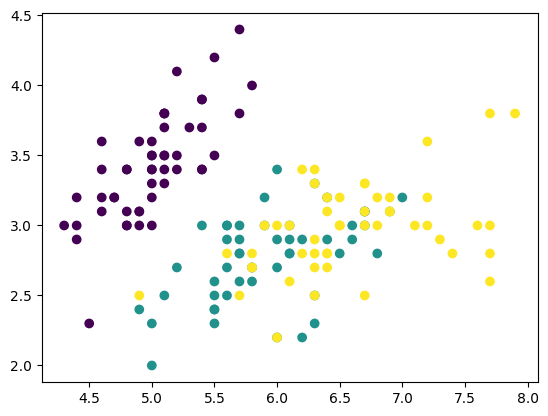

In [ ]:
# graficamos el ancho contra el largo de sepalo
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['tipo'])

En el análisis de datos llamamos a cada una de las 150 flores de Iris un objeto, cada una de las cuatro dimensiones una característica o atributo, mientras que la clase es la familia a la que pertenece(en la figura la utilizamos para colorear cada objeto).

A continuación listamos algunas de las preguntas típicas que tratamos de responder mediante el análisis de datos:

-  ¿Cuál de los datos podría contener errores o asignaciones de clases falsas?
- ¿Cuál es el error que se produce al redondear los datos a un decimal?
- ¿Cuál es la correlación entre la longitud y el ancho de los pétalos?
- ¿Qué par de dimensiones está más correlacionado?
- ¿Cual es el ancho máximo del sepalo de un flore?
- ¿Qué se esperaría de una flor que tuviera 1.8 cm como ancho de sépalo?
• ¿A qué especie pertenecería un instancia del conjunto con un ancho de sépalo de 1.8 cm?
• ¿Las tres especies contienen subespecies que se pueden identificar a partir de los datos?


## Estableciendo relaciones entre datos


Las matemáticas nos permiten establecer relaciones entre los números reales, las relaciones más utilizadas son del tipo $>,<,\geq, \leq, =, \neq$. En anális de datos establecer relaciones entre elementos de un conjunto de datos es de capital importancia. Por ello dedicaremos un par de secciones para revisar algunos conceptos relacionados con este ámbito.

Las tipos de datos (nominal, ordinal, intervalo, razón) deben tenerse en cuenta porque ciertas operaciones matemáticas son apropiadas solo para algunos tipos específicos. Los datos numéricos se pueden representar mediante conjuntos, vectores o matrices.  Cuando tratamos con datos númericos a menudo  las relaciones se establece mediante medidas de disimilitud/distancia (Lebesgue, Minkowski, Bray-Curtis, Canberra, etc) o en medidas de similitud (como el coseno, Dice, Jaccard, Tanimoto). Las secuencias se pueden analizar utilizando relaciones de secuencia (como la distancia de Hamming o la distancia de edición).

### Escalas
Las medidas numéricas pueden tener diferentes significados semánticos, y las relaciones y estadísticas que podemos aplicara serán distintas. La siguiente tabla muestra algunos de los ejemplos más utilizados.


Escala   | Operaciones | Ejemplo | Estadisticas
-------- |-----------|-------------|------------
Razón     | $*, /$      |21 años,273K      | Media
Intervalo |$+,-$        |2000 AC, 35ºF.    | Media
Ordinal   |$>,<$        | A, B+, B, C+, C  | Mediana
Nominal   |$=, \neq$    | Rojo, verde, azul| Moda
----------------------------------------------------
**Escalas para diferentes tipos de datos**

De la tabla podemo leer por ejemplo que los datos nominales (fila inferior), solo son válidas las pruebas de igualdad o desigualdad. Los valores de una característica nominal se pueden representar mediante la moda, que se define como el valor mas fecuente. Para los atributos intervalo las operaciones de suma y resta (segunda fila) son válidas Las características escaladas de intervalo tienen puntos cero arbitrarios en el sistema de datación Anno Domini o temperaturas en grados Celsius (centígrados) o Fahrenheit, por lo que, por ejemplo, no tiene sentido decir que 40◦ C es el doble de 20◦ C. Los datos de una característica a escala de intervalo, por ejemplo, un conjunto de valores $X = \{x_1,\dots, x_n\}$, se pueden representar mediante la media (revisaremos más acerca de algunos estadísticos en secciones posteriores).

In [ ]:
df.describe() # Podemos obtener un resumen básico de algunas estadísticas utilizando el metodo describe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tipo
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Representación matricial

Generalmente un conjuto de dato conformado solo de características numéricas lo representamos como

$$X=\{x_1,x_2,\dots,x_n\}$$

donde $n$ es el número de objetos/elementos en $X$, ycada elemento es un vector de características  $p$-dimensional, donde $n$ y $p$ son números enteros positivos. Para $p = 1$, llamamos a X un conjunto de datos escalares. Cuando $p>1$ el conjunto se representa como como una matriz.

$$\left(
  \begin{array}{cccc}
  x_1^{(1)} & x_1^{(2)}&\dots&x_1^{(p)}\\
  x_2^{(1)} & x_2^{(2)}&\dots&x_2^{(p)}\\
  \vdots & \vdots & \dots & \vdots \\
  x_n^{(1)} & x_n^{(2)}&\dots&x_n^{(p)}\\
  \end{array}
\right)$$

donde cada vector  $x_1,\dots, x_n$ es un vector fila con $p$ elementos. Siendo laxos podemos utilizar los conjuntos de datos y las matrices  como representaciones equivalentes. Cada fila de la matriz de datos corresponde a un elemento del conjunto de datos. Cada columna de la matriz de datos corresponde a una caracterísica de todos los elementos del conjunto de datos. Se denomina característica i-ésima o componente i-ésima $x^{(i)}, i = 1,\dots,p$.


## Relaciones

Dado un conjunto de elementos (abstractos), sin referirse necesariamente  a vectores de características numéricas.


$$O=\{o_1,o_2,\dots,o_n\}$$


A veces, no hay una representación de vector de características disponible para los objetos $o_k, k = 1, \dots , n$, por lo que los métodos convencionales de análisis de datos basados en características no son aplicables (al menos no directamente). En cambio, la relación de todos los pares de objetos a menudo se puede cuantificar y escribir como una matriz cuadrada.


$$R=\left(
  \begin{array}{cccc}
  r_{11} & r_{12}&\dots&r_{1n}\\
  r_{21} & r_{22}&\dots&r_{2n}\\
  \vdots & \vdots & \dots & \vdots \\
  r_{n1} & r_{n2}&\dots&r_{nn}\\
  \end{array}
\right) \in \mathbb{R}^{ n \times n} $$


donde cada valor de relación $r_{ij} , i, j = 1, \dots, n$ en $R$, puede referirse a un grado de similitud, disimilitud, compatibilidad, incompatibilidad, proximidad o distancia entre el par de objetos $o_i y o_j  = r{_ji}$ para todo $i,j = 1, \dots,n$. La matriz de relaciones $R$ puede definirse manualmente o calcularse a partir de las características. Si las características numéricas $X$ están disponibles, entonces $R$ puede calcularse a partir de $X$ usando una función apropiada $f : \mathbb{R}^p  \times \mathbb{R}^p  \rightarrow R$. Por ejemplo, una función relacional para las matriz para Iris puede ser definida manualmente por un botánico que comparé visualmente y luego asigne  numéricamente algunas relaciones entre pares de flores, o bien $R$ puede calcularse a partir de las longitudes y anchos de sépalos y pétalos.  A continuación presentaremos algunas relaciones de similitud y distancia.





### Relaciones de disimilitud/distancia

Una función $d$ se llama disimilitud o medida de distancia si para todo $x, y \in \mathbb{R}^p$.

$$\begin{array}{l}
d(x,y)=d(y,x)\\
d(x,y)=0 \Leftrightarrow x=y\\
d(x,z)\leq d(x,y)+d(y,z)
\end{array}$$

de los aximoas previos se sigue que $d(x,y) \geq 0$. Una clase de medidas de disimilitud se define mediante la norma $\lVert . \rVert$ de $x - y$, por lo que

$d(x,y)=\lVert x-y \rVert$

Una función $\lVert . \rVert : \mathbb{R}^p  \times \mathbb{R}^p  \rightarrow R$ es una normas si y solo si

$$\begin{array}{l}
\lVert x \rVert = 0 \Leftrightarrow x=(0,\dots,0) \\
\lVert a.x \rVert = |a| \cdot \lVert x \rVert  ~\forall_a\in\mathbb{R}, x \in \mathbb{R}^p\\
\lVert x+y \rVert = \lVert x \rVert+\lVert y \rVert ~\forall_{x,y} \in \mathbb{R}^p
\end{array}$$

Por ejemplo la llamda norma hiperbólica que esta dada por la siguiente ecuación

$$
\lVert x \rVert_h = \Pi_{i=1}^p x^{(i)}
$$

no es una norma ya que la por ejemplo la condición $\lVert x \rVert = 0 \Leftrightarrow x=(0,\dots,0)$ no se mantiene cuando $x=(0,1)$  ya que $\lVert x \rVert_h=0$ a pesar de que $x \neq (0,0)$.

Las clases de normas utilizadas con frecuencia son las normas matriciales y las normas de Lebesgue o Minkowski. La norma matricial se define como

$$\lVert x \rVert_A=\sqrt{x A x^T}$$

son una matriz $A \in \mathbb{R}^{n \times n}$. Algunos casos importantes para la matriz $A$ se definen en la siguiente tabla.





|Nombre|A||
|----|---|--|
|Eucideana| $$\left(
  \begin{array}{cccc}
  1 & 0 &\dots&0\\
  0 & 1 &\dots& 0\\
  \vdots & \vdots & \ddots & \vdots \\
  0 &  0 &\dots & 1\\
  \end{array}
\right)$$ ||
|Forbenius o Hilbert-Schmid| $$\left(
  \begin{array}{cccc}
  1 & 1 &\dots& 1\\
  1 & 1 &\dots& 1\\
  \vdots & \vdots & \ddots & \vdots \\
  1 &  1 &\dots & 1\\
  \end{array}
\right)$$ ||
|diagonal | $$\left(
  \begin{array}{cccc}
  d_1 & 0 &\dots&0\\
  0 & d_2 &\dots& 0\\
  \vdots & \vdots & \ddots & \vdots \\
  0 &  0 &\dots & d_p\\
  \end{array}
\right)$$ | cada atributo $i$ es ponderado por $d_i$ |
|Mahalanobis | $\textit{cov}^{-1}X$ |Adapta la ponderación de las características individuales en función de las estadísticas observadas.|

La norma de Lebesgue o Minkowski se define como

$$
\lVert x \rVert_{\alpha} = \sqrt[\alpha]{\sum_{j=1}^p |x^{(j)}|^{\alpha}}
$$

con $\alpha \in  \mathbb{R} \setminus \{0\}$, que es igual a la media generalizada  excepto por un factor constante $\sqrt[\alpha]{n}$. Casos especiales importantes de la norma de Lebesgue o Minkowski se resumen en la siguiente tabla.

|Nombre|definición||
|------|---------|-------|
|Infimo $\alpha \rightarrow -\infty$| $$\lVert x \rVert_{-\infty}= \min_{j=1,2\dots p} x^{(j)} $$ | |
|Manhattan (city block) $\alpha=1$|$$
\lVert x \rVert_{\alpha} = \sum_{j=1}^p |x^{(j)}|
$$ | |
|Euclideana|$$
\lVert x \rVert_{2} = \sqrt[\alpha]{\sum_{j=1}^p (x^{(j)})^{2}}
$$||
|Supremo $\alpha \rightarrow \infty$| $$\lVert x \rVert_{\infty}= \max_{j=1,2\dots p} x^{(j)} $$ | |

Otra disimilitud frecuentemente utilizada es la distancia de Hamming definida como:

 $$d_H(x,y)= \sum_{i=1}^p \rho(x^{(i)},y^{(i)}) $$

 donde

 $\rho(x,y)=\begin{cases}
 0 \text{ si } x=y\\
 1 \text{ en cualquier otro caso}
 \end{cases}$

 Note que la distancia de Hamming cuenta el número de valores de características que no coinciden. Para características binarias, la distancia de Hamming es igual a la distancia de Manhattan $d_H (x, y) = x - y$. Observe , sin embargo, que la distancia de Hamming no está asociada con una norma porque la condición $\lVert a.x \rVert = |a| \cdot \lVert x \rVert  \forall_a\in\mathbb{R}, x \in \mathbb{R}^p$ no se cumple. Las variantes de la distancia de Hamming usan funciones modificadas $\rho$ para especificar similitudes entre características individuales. Por ejemplo, si las características son (escala nominal) documentos de texto, entonces $\rho$ podría ser menor para pares  con contenido similar y mayor para pares de documentos con contenido muy diferente.

## Medidas de Similitud

Una función s se llama medida de similitud o proximidad si para todo $x, y \in \mathbb{R}^p$

$$\begin{array}{l}
s(x,y)=s(y,x)\\
s(x,x)\leq s(x,y)\\
s(x,z)\geq 0
\end{array}$$

Adicionalemente si $s(x,y)=0$ se dice que es una función de similitud normalizada.
Cualquier medida de disimilitud $d$ se puede usar para definir una medida de similitud  $s$ y viceversa, por ejemplo, usando una función positiva monótonamente decreciente $f$ con $f (0) = 1$ como

$$s(x,y)=\frac{1}{1+d(x,y)}$$

Consideremos primero las similitudes entre los vectores de características binarias. Un par de vectores de características binarias pueden ser considerados similares si muchos de sus 1's coinciden. Esta conjunción puede ser representada por el producto, por lo que el producto escalar de los vectores de características es un candidato razonable para una medida de similitud. También para características de valor real no negativo $x,y \in (\mathbb{R^+})^p$ las medidas de similitud se pueden definir en base a productos escalares que se pueden normalizar de diferentes maneras:

- Similitud coseno

$$s(x,y)=\frac{\sum_{i=1}^p x^{(i)}y^{(i)}}{\sqrt{\sum_{i=1}^p (x^{(i)})^2 \sum_{i=1}^p (y^{(i)})^2}}$$

- Similitud traslape

$$s(x,y)=\frac{\sum_{i=1}^p x^{(i)}y^{(i)}}{\min\left(\sum_{i=1}^p (x^{(i)})^2 ,\sum_{i=1}^p (y^{(i)})^2\right)}$$


- Similitud Dice (dado)

$$s(x,y)=\frac{2\sum_{i=1}^p x^{(i)}y^{(i)}}{\sum_{i=1}^p (x^{(i)})^2 +\sum_{i=1}^p (y^{(i)})^2}$$

- Jaccard (Tanimoto)


$$s(x,y)=\frac{\sum_{i=1}^p x^{(i)}y^{(i)}}{\sum_{i=1}^p (x^{(i)})^2 +\sum_{i=1}^p (y^{(i)})^2- \sum_{i=1}^p x^{(i)}y^{(i)}}$$




Estas expresiones no están definidas para vectores en el que todas características son cero porque los denominadores son cero, por lo que la similitud debe definirse explícitamente para este caso, por ejemplo, como cero.

## Relaciones sobre secuencias

En esta sección consideramos medidas que se aplican sobre secuencias de valores de características o vectores de características, por ejemplo, secuencias de valores de temperatura diarios, documentos de texto (secuencias de caracteres alfanuméricos) o secuencias de páginas web visitadas. Formalmente, dichas secuencias podrían verse como vectores de características, pero es más adecuado considerar explícitamente el carácter secuencial, el hecho de que cada elemento de la secuencia se refiera a la misma característica, y poder comparar secuencias de diferente longitud.

Usamos una función $\rho$ para comparar pares individuales de elementos de secuencia. Un ejemplo es la función de desigualdad binaria  que se usa en la distancia de Hamming (por lo que está se puede utilizar como una relación para secuencias de igual longitud).

Para calcular la relación entre secuencias de diferentes longitudes, se pueden agregar elementos neutrales como ceros o caracteres de espacio a la secuencia más corta. Dependiendo de la alineación de las subsecuencias, se pueden lograr distancias de Hamming más bajas anteponiendo o incluso insertando de manera óptima elementos neutrales. Esta es la idea detrás de la. distancia de Levenshtein o distancia de edición que determina el número mínimo de operaciones de edición (insertar, eliminar o cambiar un elemento de secuencia) necesarias para transformar una secuencia en otra. Denotamos $L_{ij} (x, y)$ como la distancia de edición entre los primeros $i$ elementos de $x$ y los primeros $j$ elementos de $y$, y de forma recursiva se define la distancia de edición como:

$$L_{ij}=\begin{cases}
  i \text{ si } j=0\\
  j \text{ si } i=0\\
  \min\{L_{i-1,j}+1,L_{i,j-1}+1, L_{i-1,j-1}+1+\rho(x^{(i)},y^{(i)})\}
\end{cases}$$

Los primeros dos casos consideran secuencias vacías y terminan la recursión (ya sea $x$ o $y$). En el tercer caso, los tres argumentos del operador mínimo corresponden a las tres operaciones de edición insertar, eliminar y cambiar. Para calcular $L_{ij}$ tenemos que calcular todo $L_{ij}, i = 1 ,\dots, p_x , j = 1,\dots, p_y$. La implementación recursiva es ineficiente, pero un solución utilizando programación dinámica puede implementarse como sigue:

In [ ]:
def levenshtein_distance(x, y):
    m = len(x) # numero de elementos en la secuencia x
    n = len(y) # numero de elementos en la secuencia y

    # Crear una matriz de (m+1) x (n+1) para almacenar los subproblemas
    # Hacemos m+1 y n+1 para agregar un vacio al inicio
    dp = np.zeros((m + 1, n + 1), dtype=int)

    # Inicializar la primera fila y columna de la matriz
    dp[:, 0] = np.arange(m + 1)
    dp[0, :] = np.arange(n + 1)

    # Calcular la distancia de Levenshtein para los subproblemas restantes
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if x[i - 1] == y[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])

    # Devolver el resultado final y  la matriz resultante
    return dp[m][n], dp

In [ ]:
x,y="INFOTEC", "INFORMACION"
d,L=levenshtein_distance(x,y)
print(f"El número necesario de ediciones para tranformar {x} en {y} son: {d}")

El número necesario de ediciones para tranformar INFOTEC en INFORMACION son: 6


La siguente tabla muestra la matriz de distancia de edición $L$ para las secuencias de caracteres alfanuméricos *INFOTEC* e *INFORMACION* Cada elemento de la matriz se calcula como el mínimo de su vecino superior más uno, vecino izquierdo más uno y vecino diagonal superior izquierdo más la distancia de carácter correspondiente. entre ambas secuencias en el valor inferior derecho, en este caso 6. Esto significa que necesitamos al menos cinco operaciones de edición para convertir la secuencia *INFOTEC* en la secuencia *INFORMACION*  y viceversa.

In [ ]:
pd.DataFrame(L,columns=[" "]+list(y), index=[" "]+list(x))

,,I,N,F,O,R,M,A,C,I,O,N
,0,1,2,3,4,5,6,7,8,9,10,11
I,1,0,1,2,3,4,5,6,7,8,9,10
N,2,1,0,1,2,3,4,5,6,7,8,9
F,3,2,1,0,1,2,3,4,5,6,7,8
O,4,3,2,1,0,1,2,3,4,5,6,7
T,5,4,3,2,1,1,2,3,4,5,6,7
E,6,5,4,3,2,2,2,3,4,5,6,7
C,7,6,5,4,3,3,3,3,3,4,5,6


Si computamos el mínimo de cada columno podemos ver que hay que realizar una edición en cada que se hay un incremento.

In [ ]:
np.min(L, axis=0) # minimo de cada columna

array([0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 6])

Note que los primeros cinco caracteres son iguales por lo que el valor se mantiene $d$ en 0 (decimos 5 porque el primer carácter sería la cadena vacia).  Para el sexto caracter debermos hacer una edición para cambiar  *T* a *R* (o viceversa) , para los caracters *M* (d=1) y *A* (d=3) hacemos bien una inserción  para transformar INFOTEC en INFORMACION o bien  borrado para hacerlo en el sentido inverson. Se mantine el valor 3 porque ambas cadenas contienen el carácter C, para los caracteres I (d=4),O (d=5) y N (d=6) se vuelve a requerir de una una inserción o borrado en cada caso.


##  Muestreo y cuantificación


En la sección anterior hemos considerado secuencias discretas finitas de características o vectores de características. En muchos casos, dicha secuencia se obtiene muestreando una señal continua $x(t)$ con un período de muestreo fijo $T$, por ejemplo, midiendo la  velocidad del viento  cada minuto, por lo que obtenemos un secuencia denominada serie de tiempo

$$x(t)=x(k.T),~~~ k=1,\dots,n$$


Supongamos que la señal estuviera definida por la función

$f(t)= t \sin(2\pi t), \text{ para } 0 < t < 10 $

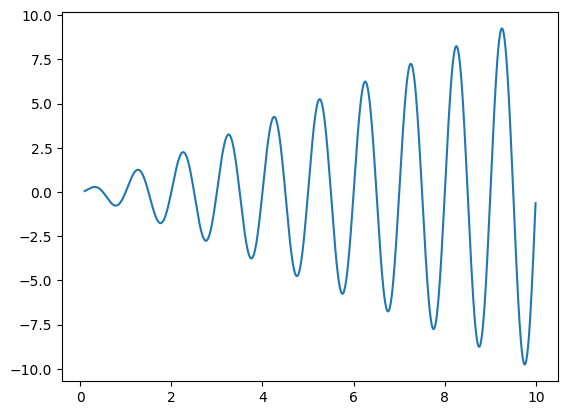

In [ ]:
t=np.arange(0.1,10,0.01) # La señal "original"
xt=t*np.sin(2*np.pi*t)
plt.plot(t,xt)

La serie tiempo que a la que podemos acceder solo contendrá  muestras individuales pero no la señal continua, por lo que puede cubrir solo una parte de la información contenida en la señal (y no los puntos infinitos contenidos en una señal continua). Con lo anterior en mente podemos ver que incrementando el valor de $T$ la calidad de la serie de tiempo será cada vez mas imprecisa hasta que ya no provea de información útil.

In [ ]:
def sampling(T=0.7):
  fig,axes=plt.subplots(1,2, figsize=(8,4), sharey=True)
  t=np.arange(0.1,10,0.01) # La señal "original"
  xt=t*np.sin(2*np.pi*t)
  tm=np.arange(0.1,10,T) # Frecuencia de muestreo
  xtm=tm*np.sin(2*np.pi*tm)
  axes[0].plot(t,xt, label="Señal Original")
  axes[1].plot(tm,xtm, label=f"Serie de tiempo T={T}", marker='.')
  axes[0].legend()
  axes[1].legend()
  plt.title("Efecto del incremento de  T")
  plt.show()

In [ ]:
interact(sampling, T=(0.1,1.5, 0.1));

NameError: ignored

Cualquier señal continua finita se puede representar como la suma de señales periódicas con diferentes frecuencias (series de Fourier). Una señal $x(t)$ se denomina limitada en banda si la frecuencia máxima $f_{\max}$ de estas señales periódicas es finita, por lo que el espectro de Fourier es $|x(j2\pi f)| = 0$ para $f > f_{\max}$. Si esta señal se muestrea con un período de muestreo menor que $Ts = 1/(2 f_{\max})$, o equivalentemente, una frecuencia de muestreo mayor que $f_s = 2 f_{\max}$, entonces la señal original se puede reconstruir completamente a partir de la serie temporal (infinita). Esto se conoce como el teorema de muestreo de Shannon. La condición $T \leq Ts$ (o $f \geq f_s$) se denomina condición de Nyquist. En proyectos prácticos de análisis de datos, a menudo solo se disponen de datos muestreados y no de las señales originales. Dado que solo se tienen los datos muestreados, no es posible determinar si el muestreo se realizó de acuerdo con la condición de Nyquist. Por lo tanto, suele ser útil discutir este tema con los proveedores de datos.

### Cuantización

La primera parte de esta sección consideró la discretización en el tiempo, llamada muestreo. A continuación, consideramos la discretización de los valores de los datos, llamada cuantización.

La cuantización se aplica a valores analógicos que se digitalizan con precisión finita, así como a valores digitales cuya precisión se reduce para ahorrar memoria o acelerar la transmisión de datos. La cuantización asigna un intervalo continuo $[x_{\min}, x_{\max}]$ a un conjunto de valores discretos $\{x_1,\dots, x_q\}$, donde $q$ es el número de niveles de cuantización.  Cada valor cuantizado se puede representar como un número binario de $b = ⌈\log_2 q⌉$ bits, por ejemplo. Cada valor continuo $x \in  [x_{\min}, x_{\max}]$ se puede traducir a un valor cuantizado $x_k \in \{x_1, \dots , x_q\}$ o a un índice $k \in {1,\dots,q}$ mediante el redondeo.

$$\frac{\frac{x_{k-1}+x_k}{2}+x_1}{x_q-x_1} \leq \frac{x-x_{\min}}{x_{\max}-x_{\min}}< \frac{\frac{x_k+x_{k+1}}{2}+x_1}{x_q-x_1} $$

El proceso de cuantización provoca un error de cuantización. El error de cuantización está relacionado con el número de bits utilizado para represetar un dato númerico. Un número binario con $b$ bits puede representar enteros entre $x_1 = 0$ y $x_q = 2^b-1$. El error de cuantización relativo puede estimarse como $|e/(x_q - x_1)| \leq 100\%/2/(2^b-1) \approx b+1$. Para valores típicos de $b \geq 8$, este error de cuantización a menudo puede ser prácticamente ignorado si se eligen adecuadamente los límites $x_{\min}$ y $x_{\max}$. Si el rango $x_{\max}-x_{\min}$ es mucho mayor que la variación real de los datos, entonces los datos cuantizados pueden parecer constantes o posiblemente mostrar saltos repentinos causados por los límites de los niveles de cuantización.